In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [8,5]})

In [28]:
from src.differential_value_iteration.environments import three_loop_mrp
from src.differential_value_iteration.algorithms import RVI_Evaluation, DVI_Evaluation
from src.differential_value_iteration.utils import run_alg, draw

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
env = three_loop_mrp

### Synchronous RVI (sRVI) on the 3-loop problem

RVI Evaluation starting alpha:1.0 Converged? False
RVI Evaluation starting alpha:0.999 Converged? True
RVI Evaluation starting alpha:0.99 Converged? True
RVI Evaluation starting alpha:0.9 Converged? True
RVI Evaluation starting alpha:0.7 Converged? True
RVI Evaluation starting alpha:0.5 Converged? True
RVI Evaluation starting alpha:0.3 Converged? True
RVI Evaluation starting alpha:0.1 Converged? True
RVI Evaluation starting alpha:0.01 Converged? True
RVI Evaluation starting alpha:0.001 Converged? True


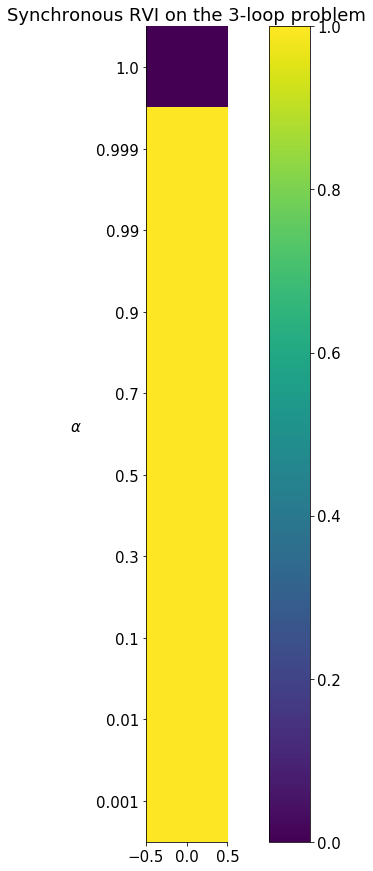

In [30]:
alphas = [1.0, 0.999, 0.99, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01, 0.001]
max_iters = 50000
epsilon = 0.001

init_v = np.zeros(env.num_states())
init_g_scalar = 0
convergence_flags = np.zeros(alphas.__len__())
for i, alpha in enumerate(alphas):
    alg = RVI_Evaluation(env, init_v, alpha, ref_idx=0)
    print(f'RVI Evaluation starting alpha:{alpha}', end=' ')
    convergence = run_alg(alg, 'exec_sync', max_iters, epsilon)
    print(f'Converged? {convergence}')
    convergence_flags[i] = convergence

draw(convergence_flags, 'Synchronous RVI on the 3-loop problem', alphas)

For $\alpha=1$, sRVI does not converge on the (periodic) 3-loop problem.

### Synchronous DVI (sDVI) on the 3-loop problem

In [31]:
betas = [1.0, 0.999, 0.99, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01, 0.001]

convergence_flags = np.zeros((alphas.__len__(), betas.__len__()))
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        alg = DVI_Evaluation(env, init_v, init_g_scalar, alpha, beta)
        print(f'DVI Evaluation starting alpha:{alpha}', end=' ')
        convergence = run_alg(alg, 'exec_sync', max_iters, epsilon)
        print(f'Converged? {convergence}')
        convergence_flags[i][j] = convergence

DVI Evaluation starting alpha:1.0 

/Users/yiwan/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/yiwan/Desktop/playground/differential-value-iteration/src/differential_value_iteration/algorithms/algorithms.py:163: RuntimeWarning: invalid value encountered in double_scalars
  self.g += self.beta * np.sum(delta)


Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:1.0 Converged? False
DVI Evaluation starting alpha:0.999 Converged? False
DVI Evaluation starting alpha:0.999 Converged? False
DVI Evaluation starting alpha:0.999 Converged? False
DVI Evaluation starting alpha:0.999 Converged? False
DVI Evaluation starting alpha:0.999 Converged? False
DVI Evaluation starting alpha:0.999 Converged? True
DVI Evaluation starting alpha:0.999 Converged? True
DVI Evaluation starting alpha:0.999 Converged? True
DVI Evaluation starting alpha:0.999 Converged? True
DVI Evaluation starting alpha:0.999 Converged? True

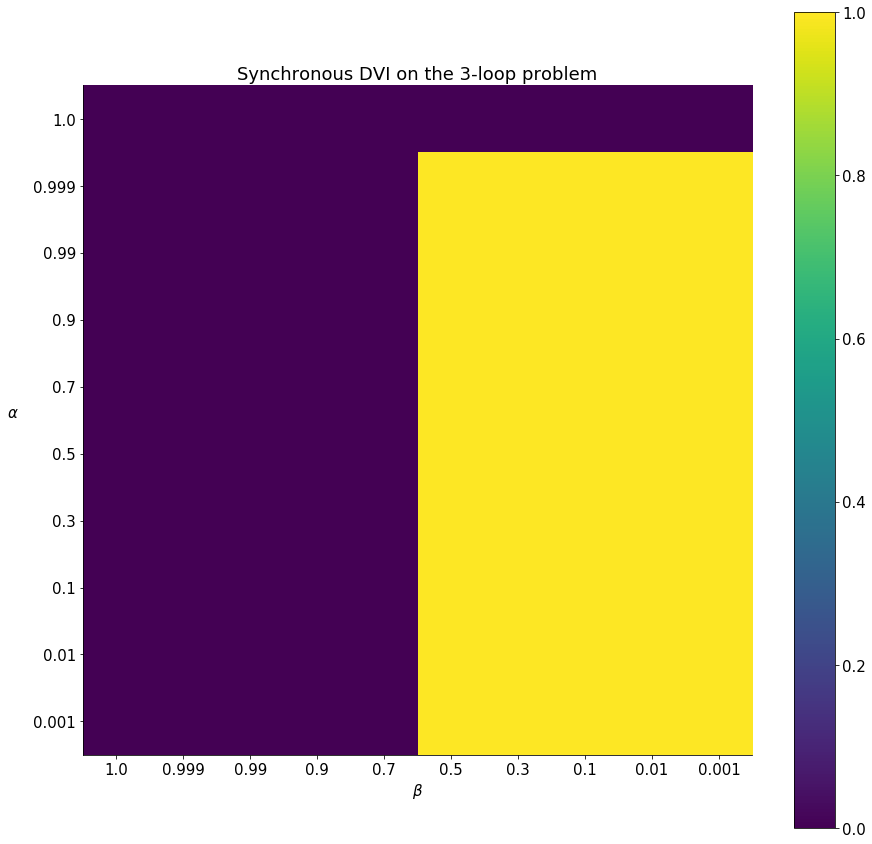

In [32]:
draw(convergence_flags, 'Synchronous DVI on the 3-loop problem', alphas, betas)

If $\alpha=1$, sDVI does not converge for any value of $\beta$ on the (periodic) 3-loop problem.